# Assistant (Preview)

With the Azure OpenAI Assistant (Preview), you can create an AI assistant tailored to your needs using custom instructions and enhance it with advanced tools such as code interpreters and custom functions. This article provides a comprehensive guide on how to get started with the Assistant API.

## API Version: 2024-02-15-preview
Check availability: 

https://learn.microsoft.com/en-us/azure/ai-services/openai/concepts/models#assistants-preview

## Creating an assisstant

The requested model 'gpt-4o' with engine 'gpt-4o-2024-11-20' cannot be used with the Assistants API.

In [1]:
import os
import json
from openai import AzureOpenAI
from dotenv import load_dotenv

# Load the environment variables from the .env file
load_dotenv()
    
client = AzureOpenAI(
    azure_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT","").strip(),
    api_key        = os.getenv("AZURE_OPENAI_API_KEY"),
    api_version    = "2024-02-15-preview"
)

deployment_name = "gpt-4o-mini"
# deployment_name = os.getenv("DEPLOYMENT_NAME")

# Create an assistant
assistant = client.beta.assistants.create(
    name="Data Visualization",
    instructions=f"You are a helpful AI assistant who makes interesting visualizations based on data." 
    f"You have access to a sandboxed environment for writing and testing code."
    f"When you are asked to create a visualization you should follow these steps:"
    f"1. Write the code."
    f"2. Anytime you write new code display a preview of the code to show your work."
    f"3. Run the code to confirm that it runs."
    f"4. If the code is successful display the visualization."
    f"5. If the code is unsuccessful display the error message and try to revise the code and rerun going through the steps from above again.",
    tools=[{"type": "code_interpreter"}],
    model=deployment_name,
)

In [2]:
print(assistant.model_dump_json(indent=2))

{
  "id": "asst_HYqEuLQKJaMpXt4YZ7jci54c",
  "created_at": 1735826534,
  "description": null,
  "file_ids": [],
  "instructions": "You are a helpful AI assistant who makes interesting visualizations based on data.You have access to a sandboxed environment for writing and testing code.When you are asked to create a visualization you should follow these steps:1. Write the code.2. Anytime you write new code display a preview of the code to show your work.3. Run the code to confirm that it runs.4. If the code is successful display the visualization.5. If the code is unsuccessful display the error message and try to revise the code and rerun going through the steps from above again.",
  "metadata": {},
  "model": "gpt-4o-mini",
  "name": "Data Visualization",
  "object": "assistant",
  "tools": [
    {
      "type": "code_interpreter"
    }
  ],
  "top_p": 1.0,
  "temperature": 1.0,
  "response_format": "auto"
}


## Creating a thread

Thread is a conversation session between an Assistant and a user. Threads store Messages and automatically handle truncation to fit content into a model’s context.

In [3]:
# Create a thread
thread = client.beta.threads.create()
print(thread)

Thread(id='thread_r6AQvyMakXDfnrF0JEama3db', created_at=1735826535, metadata={}, object='thread')


In [4]:
# Add a user question to the thread
message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="Create a visualization of a sinewave"
)

In [5]:
# list thread messages
thread_messages = client.beta.threads.messages.list(thread.id)
print(thread_messages.model_dump_json(indent=2))

{
  "data": [
    {
      "id": "msg_SHhPMTgqf85dazgP8f0LVhLn",
      "assistant_id": null,
      "content": [
        {
          "text": {
            "annotations": [],
            "value": "Create a visualization of a sinewave"
          },
          "type": "text"
        }
      ],
      "created_at": 1735826535,
      "file_ids": [],
      "metadata": {},
      "object": "thread.message",
      "role": "user",
      "run_id": null,
      "thread_id": "thread_r6AQvyMakXDfnrF0JEama3db"
    }
  ],
  "object": "list",
  "first_id": "msg_SHhPMTgqf85dazgP8f0LVhLn",
  "last_id": "msg_SHhPMTgqf85dazgP8f0LVhLn",
  "has_more": false
}


In [6]:
# create a thread
# you can also use intructions here to override the default instructions
run = client.beta.threads.runs.create(
  thread_id=thread.id,
  assistant_id=assistant.id,
)

In [7]:
# retrieve thread status
# Retrieve the status of the run
run = client.beta.threads.runs.retrieve(
  thread_id=thread.id,
  run_id=run.id
)

status = run.status
print(status)

in_progress


In [8]:
status = run.status
print(status)

in_progress


In [9]:
# check the status of the run
import time
from IPython.display import clear_output

start_time = time.time()

status = run.status

while status not in ["completed", "cancelled", "expired", "failed"]:
    time.sleep(5)
    run = client.beta.threads.runs.retrieve(thread_id=thread.id,run_id=run.id)
    print("Elapsed time: {} minutes {} seconds".format(int((time.time() - start_time) // 60), int((time.time() - start_time) % 60)))
    status = run.status
    print(f'Status: {status}')
    clear_output(wait=True)

messages = client.beta.threads.messages.list(
  thread_id=thread.id
) 

print(f'Status: {status}')
print("Elapsed time: {} minutes {} seconds".format(int((time.time() - start_time) // 60), int((time.time() - start_time) % 60)))
print(messages.model_dump_json(indent=2))

Status: completed
Elapsed time: 0 minutes 6 seconds
{
  "data": [
    {
      "id": "msg_UcHp7bLZl5W4FskG3kvfTAIW",
      "assistant_id": "asst_HYqEuLQKJaMpXt4YZ7jci54c",
      "content": [
        {
          "image_file": {
            "file_id": "assistant-3qXbWzIUv1Y1slUDGoyncg8P"
          },
          "type": "image_file"
        },
        {
          "text": {
            "annotations": [],
            "value": "Here is the visualization of a sine wave. The graph displays the sine function over the interval from \\(0\\) to \\(2\\pi\\). The wave fluctuates between -1 and 1, showing its periodic nature. If you have any other requests or need modifications, feel free to ask!"
          },
          "type": "text"
        }
      ],
      "created_at": 1735826542,
      "file_ids": [],
      "metadata": {},
      "object": "thread.message",
      "role": "assistant",
      "run_id": "run_JGrisNPgPvFXnckNLsoht7zN",
      "thread_id": "thread_r6AQvyMakXDfnrF0JEama3db"
    },
    {
  

In [10]:
messages = client.beta.threads.messages.list(
  thread_id=thread.id
)

print(messages.model_dump_json(indent=2))

{
  "data": [
    {
      "id": "msg_UcHp7bLZl5W4FskG3kvfTAIW",
      "assistant_id": "asst_HYqEuLQKJaMpXt4YZ7jci54c",
      "content": [
        {
          "image_file": {
            "file_id": "assistant-3qXbWzIUv1Y1slUDGoyncg8P"
          },
          "type": "image_file"
        },
        {
          "text": {
            "annotations": [],
            "value": "Here is the visualization of a sine wave. The graph displays the sine function over the interval from \\(0\\) to \\(2\\pi\\). The wave fluctuates between -1 and 1, showing its periodic nature. If you have any other requests or need modifications, feel free to ask!"
          },
          "type": "text"
        }
      ],
      "created_at": 1735826542,
      "file_ids": [],
      "metadata": {},
      "object": "thread.message",
      "role": "assistant",
      "run_id": "run_JGrisNPgPvFXnckNLsoht7zN",
      "thread_id": "thread_r6AQvyMakXDfnrF0JEama3db"
    },
    {
      "id": "msg_SHhPMTgqf85dazgP8f0LVhLn",
      "ass

In [11]:
# show the file name
data = json.loads(messages.model_dump_json(indent=2))  # Load JSON data into a Python object
image_file_id = data['data'][0]['content'][0]['image_file']['file_id']

print(image_file_id)  # Outputs: assistant-1YGVTvNzc2JXajI5JU9F0HMD

assistant-3qXbWzIUv1Y1slUDGoyncg8P


In [12]:
# download the file
content = client.files.content(image_file_id)

image= content.write_to_file("sinewave.png")

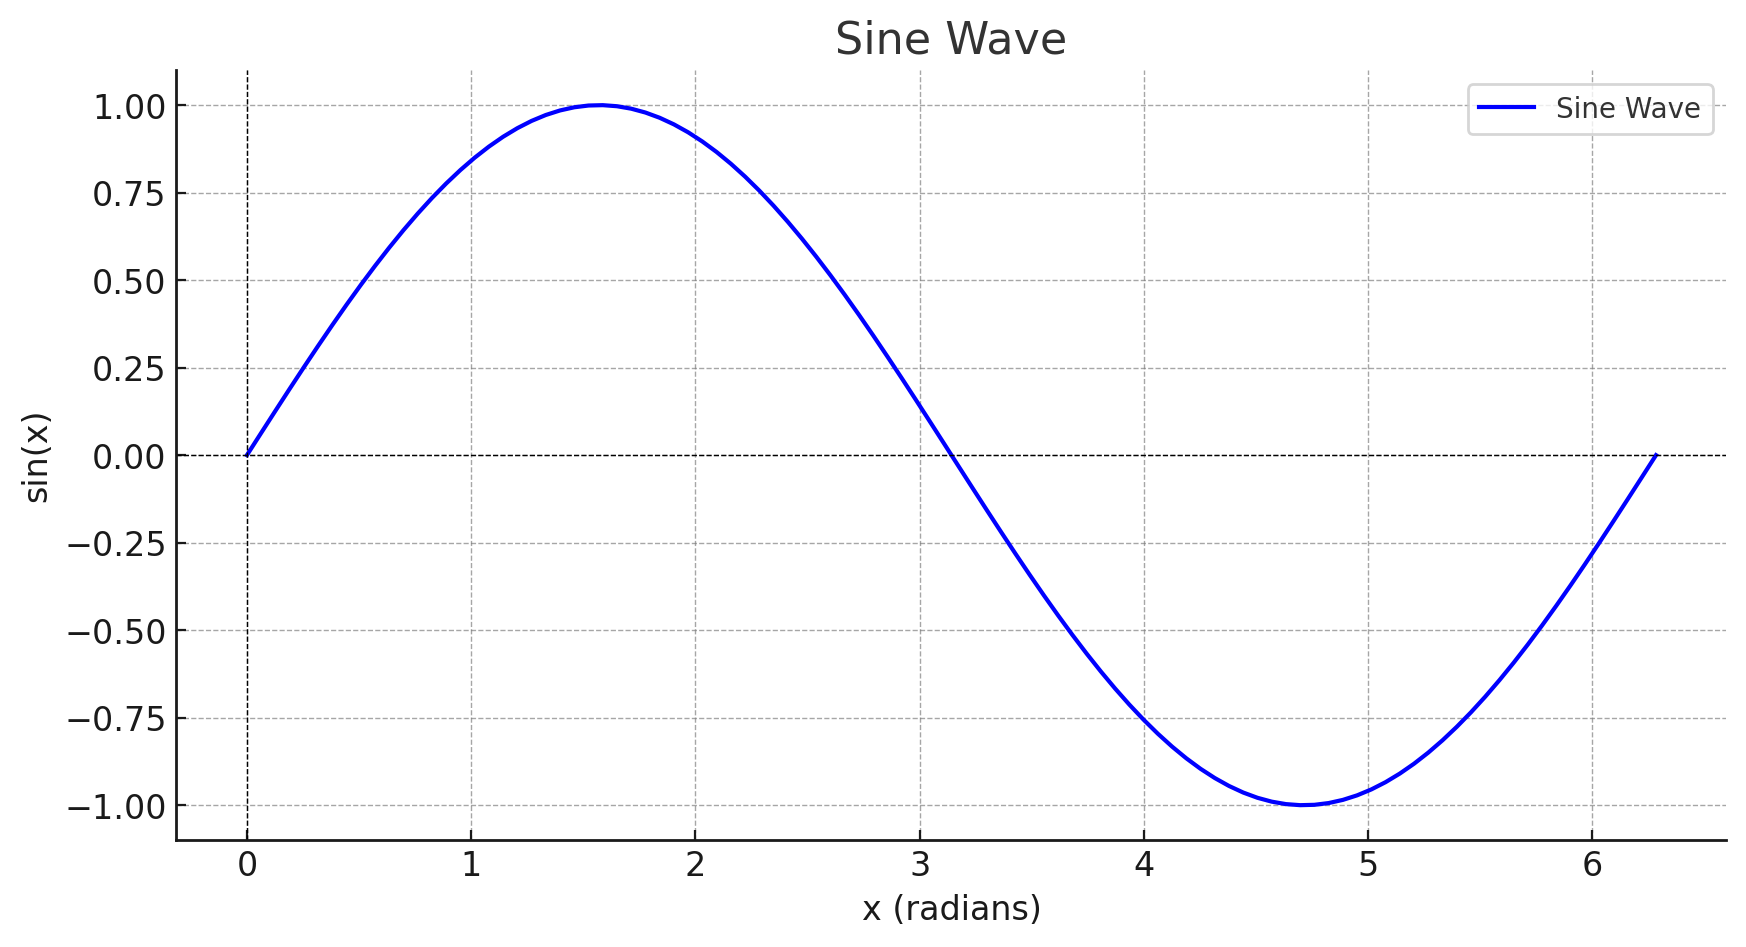

In [13]:
# rewrite the code to display the image in jupyter notebook

from PIL import Image

# Display the image in the default image viewer
image = Image.open("sinewave.png")
image.show()

## Ask follow up questions

In [14]:
# Add a new user question to the thread
message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="Extract only the Python code."
)

In [15]:
run = client.beta.threads.runs.create(
  thread_id=thread.id,
  assistant_id=assistant.id,
  #instructions="New instructions" #You can optionally provide new instructions  but these will override the default instructions
)

# Retrieve the status of the run
run = client.beta.threads.runs.retrieve(
  thread_id=thread.id,
  run_id=run.id
)

status = run.status
print(status)

in_progress


In [16]:
messages = client.beta.threads.messages.list(
  thread_id=thread.id
)

print(messages.model_dump_json(indent=2))

{
  "data": [
    {
      "id": "msg_b1MeJYgMubqsuL007dY0v7LH",
      "assistant_id": "asst_HYqEuLQKJaMpXt4YZ7jci54c",
      "content": [],
      "created_at": 1735826548,
      "file_ids": [],
      "metadata": {},
      "object": "thread.message",
      "role": "assistant",
      "run_id": "run_V7AxdiqUDu8EteBEjQhfMCbk",
      "thread_id": "thread_r6AQvyMakXDfnrF0JEama3db"
    },
    {
      "id": "msg_E5KVXsJu4nQ1NZKgkbidc9Y1",
      "assistant_id": null,
      "content": [
        {
          "text": {
            "annotations": [],
            "value": "Extract only the Python code."
          },
          "type": "text"
        }
      ],
      "created_at": 1735826547,
      "file_ids": [],
      "metadata": {},
      "object": "thread.message",
      "role": "user",
      "run_id": null,
      "thread_id": "thread_r6AQvyMakXDfnrF0JEama3db"
    },
    {
      "id": "msg_UcHp7bLZl5W4FskG3kvfTAIW",
      "assistant_id": "asst_HYqEuLQKJaMpXt4YZ7jci54c",
      "content": [
        {

In [17]:
start_time = time.time()

status = run.status

while status not in ["completed", "cancelled", "expired", "failed"]:
    time.sleep(5)
    run = client.beta.threads.runs.retrieve(thread_id=thread.id, run_id=run.id)
    print("Elapsed time: {} minutes {} seconds".format(
        int((time.time() - start_time) // 60), int((time.time() - start_time) % 60)))
    status = run.status
    print(f'Status: {status}')
    clear_output(wait=True)

messages = client.beta.threads.messages.list(
    thread_id=thread.id
)

print(f'Status: {status}')
print("Elapsed time: {} minutes {} seconds".format(
    int((time.time() - start_time) // 60), int((time.time() - start_time) % 60)))
print(messages.model_dump_json(indent=2))

Status: completed
Elapsed time: 0 minutes 7 seconds
{
  "data": [
    {
      "id": "msg_b1MeJYgMubqsuL007dY0v7LH",
      "assistant_id": "asst_HYqEuLQKJaMpXt4YZ7jci54c",
      "content": [
        {
          "text": {
            "annotations": [],
            "value": "Certainly! Here is the Python code used to create the sine wave visualization:\n\n```python\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# Generate data for sine wave\nx = np.linspace(0, 2 * np.pi, 100)\ny = np.sin(x)\n\n# Create the plot\nplt.figure(figsize=(10, 5))\nplt.plot(x, y, label='Sine Wave', color='blue')\nplt.title('Sine Wave')\nplt.xlabel('x (radians)')\nplt.ylabel('sin(x)')\nplt.axhline(0, color='black',linewidth=0.5, ls='--')\nplt.axvline(0, color='black',linewidth=0.5, ls='--')\nplt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)\nplt.legend()\nplt.show()\n```"
          },
          "type": "text"
        }
      ],
      "created_at": 1735826548,
      "file_ids": [],
      "metadat

In [18]:
# Load JSON data into a Python object
data = json.loads(messages.model_dump_json(indent=2))
code = data['data'][0]['content'][0]['text']['value']
print(code)

Certainly! Here is the Python code used to create the sine wave visualization:

```python
import numpy as np
import matplotlib.pyplot as plt

# Generate data for sine wave
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Sine Wave', color='blue')
plt.title('Sine Wave')
plt.xlabel('x (radians)')
plt.ylabel('sin(x)')
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()
```


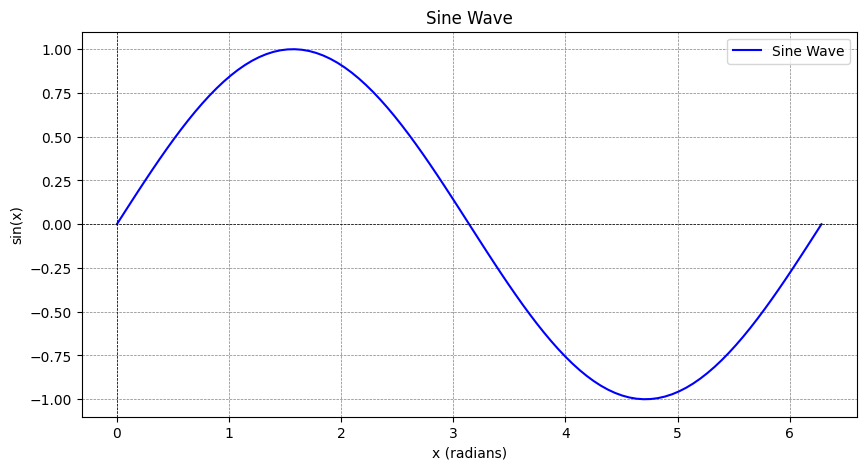

In [19]:
import re
pre_processing_code = re.search(r"```python(.*?)```", code, re.DOTALL).group(1)
exec(pre_processing_code)

The created code can be reused instead of calling the Assistant API.